In [18]:
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [12]:
mask_path = '../data/'

In [2]:
def rotate_bound(image, angle):
    # grab the dimensions of the image and then determine the
    # center
    (h, w) = image.shape[:2]
    (cX, cY) = (w // 2, h // 2)
    # grab the rotation matrix (applying the negative of the
    # angle to rotate clockwise), then grab the sine and cosine
    # (i.e., the rotation components of the matrix)
    M = cv2.getRotationMatrix2D((cX, cY), -angle, 1.0)
    cos = np.abs(M[0, 0])
    sin = np.abs(M[0, 1])
    # compute the new bounding dimensions of the image
    nW = int((h * sin) + (w * cos))
    nH = int((h * cos) + (w * sin))
    # adjust the rotation matrix to take into account translation
    M[0, 2] += (nW / 2) - cX
    M[1, 2] += (nH / 2) - cY
    # perform the actual rotation and return the image
    return cv2.warpAffine(image, M, (nW, nH))

In [34]:
img_orig = cv2.imread(os.path.join(mask_path,'mask-1-cropped.jpg'),0)
ret, mask = cv2.threshold(img_orig, 10, 255, cv2.THRESH_BINARY)
#ret,th1 = cv2.threshold(img_orig,200,255,cv2.THRESH_BINARY)

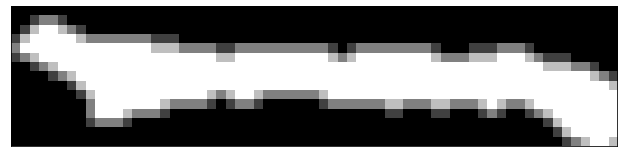

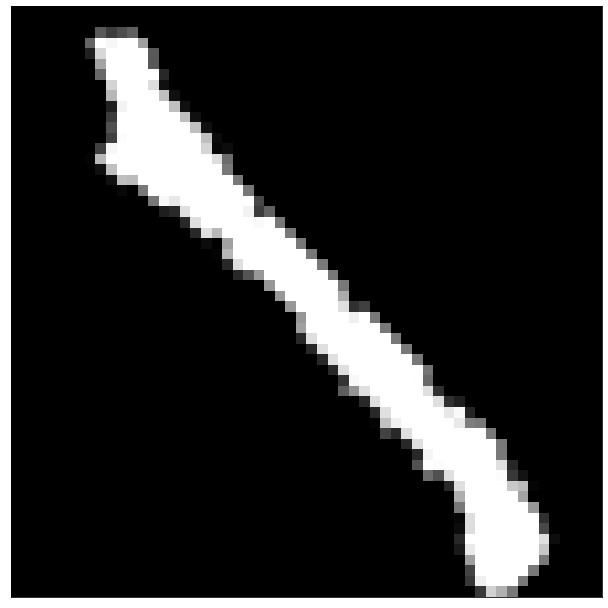

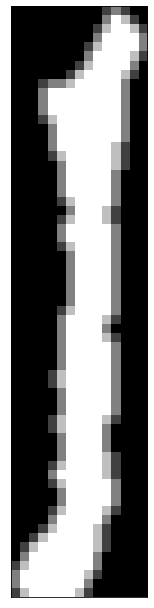

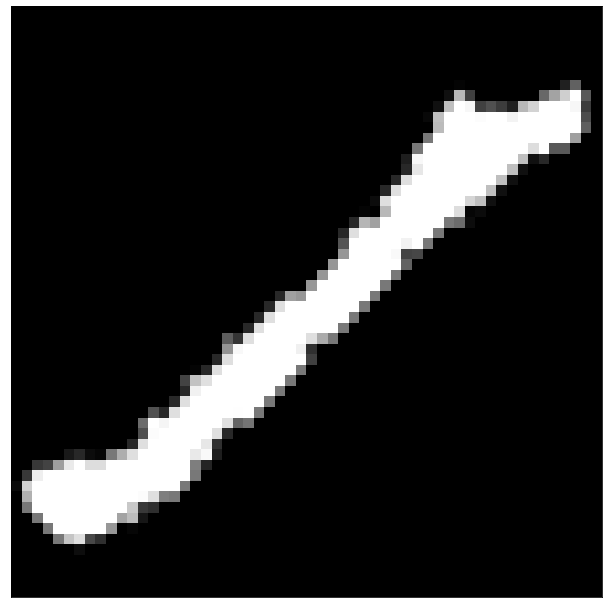

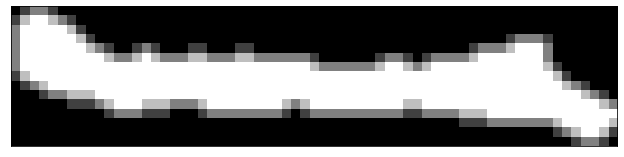

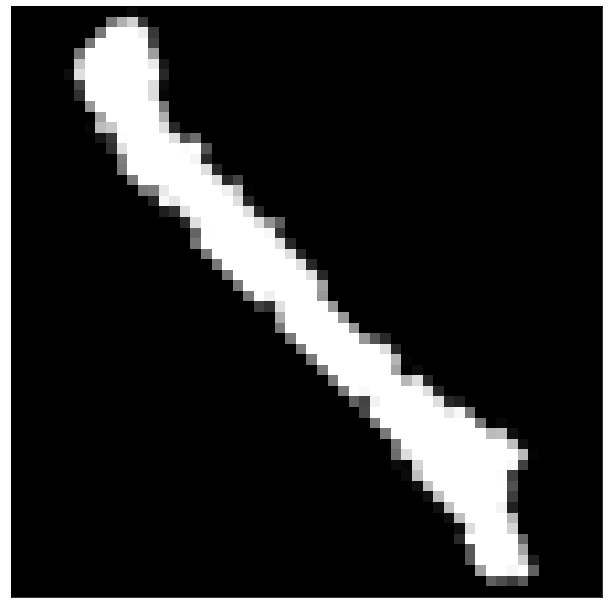

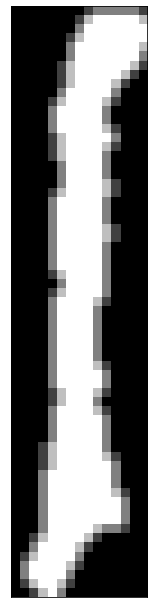

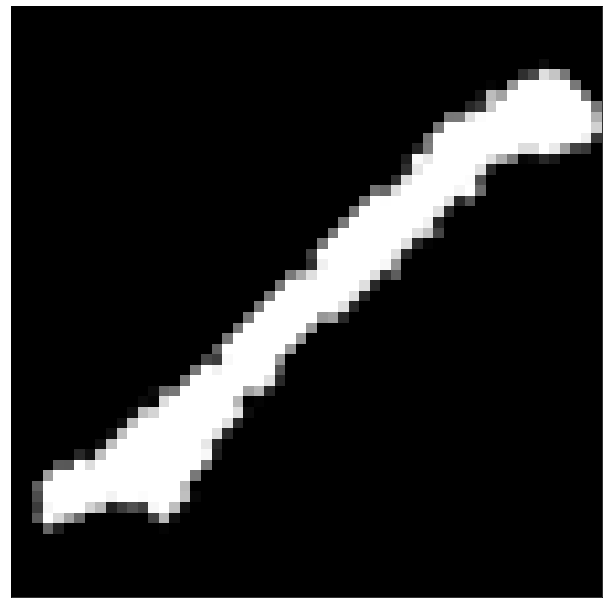

In [35]:
angle = 0
for i in range(8):
    img = rotate_bound(mask, angle)
    
    plt.figure(figsize=(50,50))
    plt.subplot(4,4,i+1),plt.imshow(img,'gray')
    plt.xticks([]),plt.yticks([])
    angle += 45
plt.show()